In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('../Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

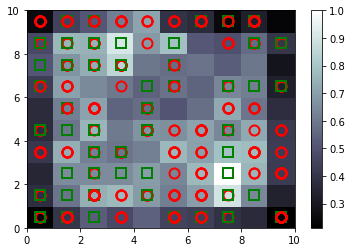

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [14]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,3)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15654625
15641733
15802869
15750545
15665014
15663942
15720529
15728906
15692430
15636626
15729377
15643574


In [16]:
customers = dataset.iloc[:, 1:].values

is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

import tensorflow as tf

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

y_pred

Epoch 1/10
690/690 [==============================] - 2s 1ms/step - loss: 0.5101 - accuracy: 0.7812
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2441 - accuracy: 0.9594
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1595 - accuracy: 0.9826
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1194 - accuracy: 0.9826
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0957 - accuracy: 0.9826
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0798 - accuracy: 0.9826
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0699 - accuracy: 0.9826
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0653 - accuracy: 0.9826
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0625 - accuracy: 0.9826
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0608 - accuracy: 0.9826

array([[1.57785890e+07, 1.59443907e-08],
       [1.57574340e+07, 1.79178379e-08],
       [1.56844400e+07, 1.88317131e-08],
       ...,
       [1.56688890e+07, 1.39435202e-01],
       [1.58028690e+07, 1.39435202e-01],
       [1.55924120e+07, 1.39435202e-01]])